In [349]:
import cv2 as cv
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({"images":[], "label":[]})
train_path = '../raw data/asl_dataset/'
folders = glob(train_path+'/*')
noclasses = len(folders)
print(noclasses)

36


In [359]:
for path in folders:
    img_path = glob(path+'/*')
    _,label = os.path.split(path)
    files = os.listdir(path)
    for filename in files:
        im = cv.imread(path+'/'+filename, 64).flatten() # 64 is for IMREAD_REDUCED_GRAYSCALE_8 (grayscale, 1/8th)
#         res = cv.resize(im, dsize=(42, 42)) # resize image
        data = pd.DataFrame({"images":[im], "label":[label]})
        df = df.append(data, ignore_index = True)

In [361]:
X = np.vstack(df['images'])
y = df['label']
print(X.shape)
print(y.shape)

(5030, 2500)
(5030,)


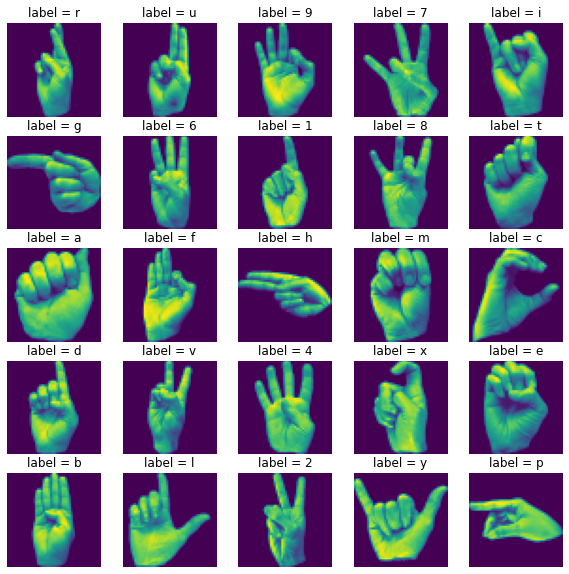

In [362]:
import numpy as np
import matplotlib.pyplot as plt
import math

gridsize = 5
numfigs = gridsize**2
figsize = (10, 10)
cols = gridsize
rows = gridsize

def trim(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
    
plot, axs = plt.subplots(rows, cols, figsize=figsize)
axs = trim(axs, numfigs)
for ax, fig in zip(axs, range(0, 2520, math.floor(2520/numfigs))):
    sign = X[fig]
    sign_pixels = sign.reshape(50, 50)
    ax.imshow(sign_pixels)
    ax.axis('off')
    ax.set_title('label = %s' % str(y[fig]))

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [364]:
print("Images training data shape:")
print(X_train.shape)
print("\nLabels training data shape:")
print(y_train.shape)
print("\nImages test data shape:")
print(X_test.shape)
print("\nLabels test data shape:")
print(y_test.shape)

Images training data shape:
(3772, 2500)

Labels training data shape:
(3772,)

Images test data shape:
(1258, 2500)

Labels test data shape:
(1258,)


In [365]:
from sklearn.linear_model import LogisticRegression
# in my research for this, I found that the default solver (lbfgs) is too slow for this problem.
logisticRegr = LogisticRegression(C=50. / len(X_train), penalty='l1', solver='saga', tol=0.1)
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
# show score to confirm success 
score = logisticRegr.score(X_test, y_test)
print(score)

0.9626391096979332


In [366]:
from sklearn.metrics import classification_report
print(
    f"Classification report:\n"
    f"{classification_report(y_test, predictions)}\n"
)

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.97      1.00      0.98        29
           2       0.92      0.94      0.93        35
           3       1.00      1.00      1.00        34
           4       0.94      0.78      0.85        40
           5       0.85      0.90      0.88        31
           6       0.78      0.83      0.81        30
           7       1.00      0.97      0.99        35
           8       0.96      1.00      0.98        25
           9       0.90      1.00      0.95        27
           a       1.00      1.00      1.00        35
           b       1.00      0.97      0.99        37
           c       1.00      1.00      1.00        38
           d       0.95      1.00      0.98        40
           e       1.00      1.00      1.00        31
           f       1.00      1.00      1.00        29
           g       1.00      1.00      1.00        40
    

In [367]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

Count of misclassified: 47, total test imgs: 1258
Percent misclassified: 3.7360890302066774%

First 25 misclassifications:


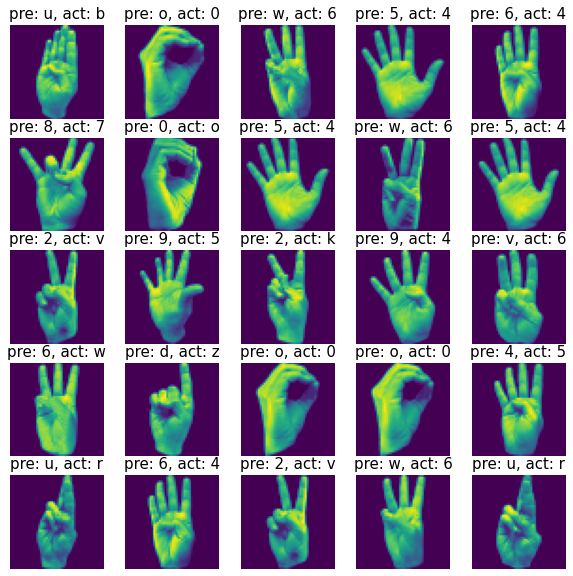

In [372]:
missedCount = len(misclassifiedIndexes)
print('Count of misclassified: {}, total test imgs: {}'.format(missedCount, len(predictions)))
print('Percent misclassified: {}%'.format(missedCount / len(predictions) * 100))
print('\nFirst 25 misclassifications:')

test_img = np.array(X_test)
test_lbl = np.array(y_test)
    
plot, axs = plt.subplots(rows, cols, figsize=figsize)
axs = trim(axs, numfigs)
for ax, badindex in zip(axs, misclassifiedIndexes[0:25]):
    digit = test_img[badindex]
    digit_pixels = digit.reshape(50, 50)
    ax.imshow(digit_pixels)
    ax.axis('off')
    ax.set_title('pre: {}, act: {}'.format(predictions[badindex], test_lbl[badindex]), fontsize = 15)